# Put it all together
- Pull a video
- Loop through frames.
- Determine where the gt_chessboard is (if it is) in the frame.
- Extract the GT board
    - See if it changed?
- Replace the gt board with filler (first frame?)
- Store FEN until the final frame
- Identify when the gameplay portion is over and quit

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../src/')

# from video_pull import pull_video
from tqdm import tqdm

import matplotlib.pylab as plt
import cv2

In [3]:
%matplotlib inline

In [4]:
from label_extract import VideoBoardExtractor

vbe = VideoBoardExtractor('../data/CoffeeChess/HIIMcHIJCnM.mp4',
                         gt_board_loc=[20, 415, 475, 865],
                         predict_fen=True)

vbe.load_videocap()
vbe.process_video(30 * 60 * 1)

	 Loading model '../tensorflow_chessbot/saved_models/frozen_graph.pb'
	 Model restored.


100%|█████████▉| 1799/1800 [00:40<00:00, 43.88it/s]


## Show the first frame

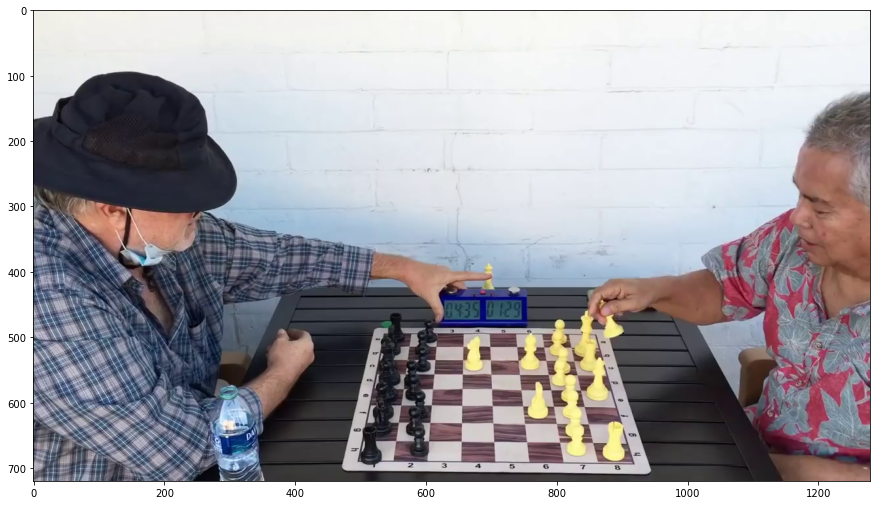

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(vbe.first_frame_img)

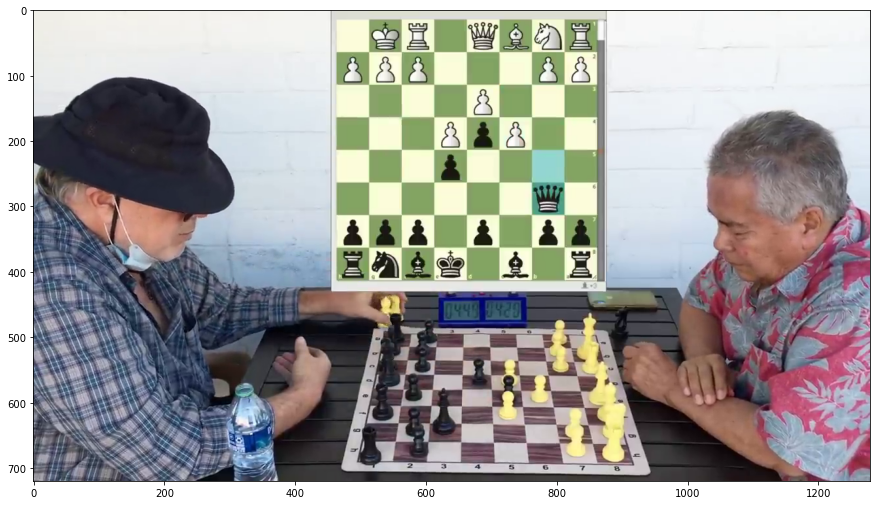

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(vbe.this_frame_img)

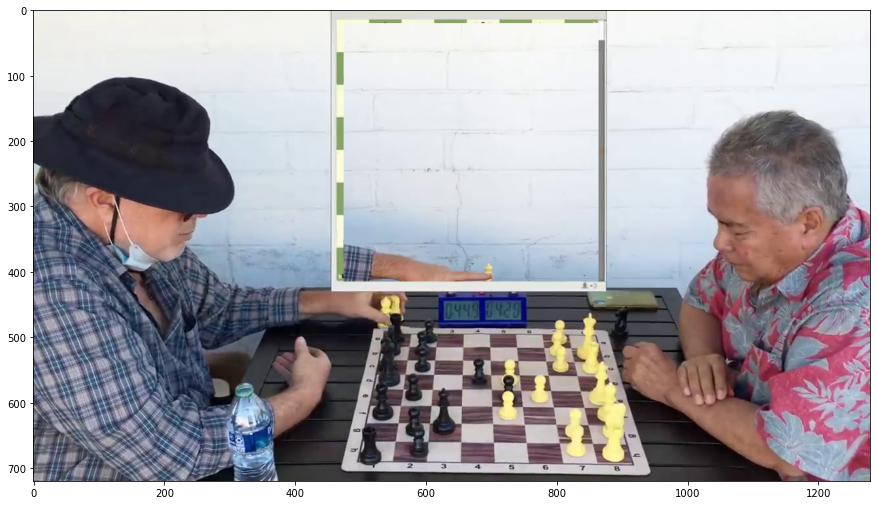

In [8]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(vbe.masked_img)

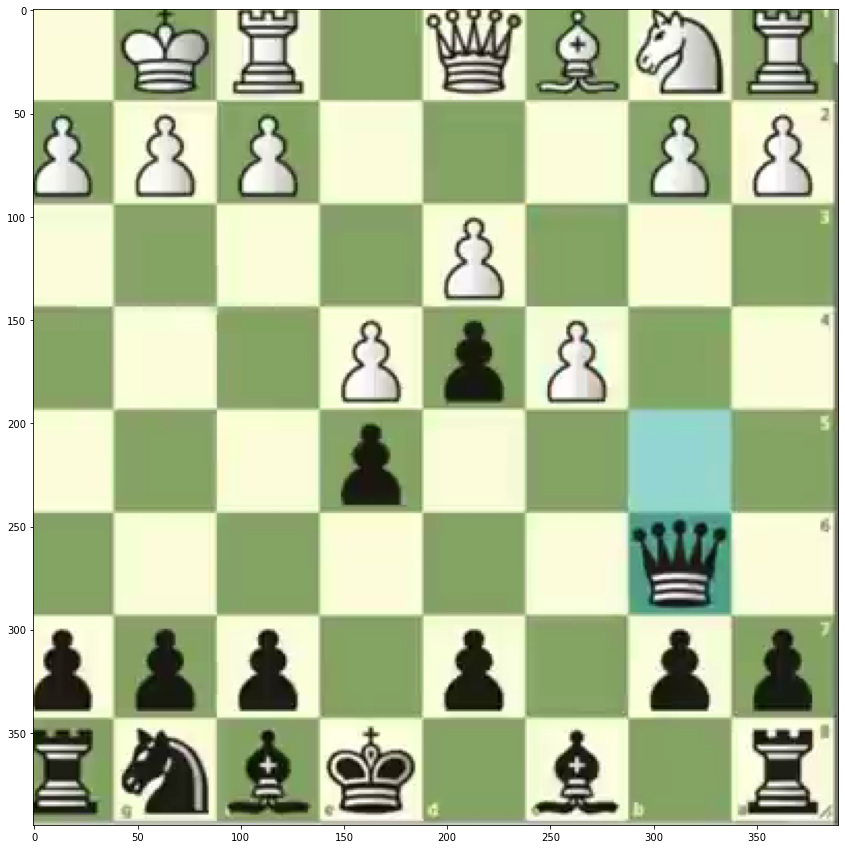

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(vbe.gt_board)

In [12]:
fens_flat = []
last_fen = None
for frame, fen in vbe.fens.items():
    if fen != last_fen:
        fens_flat.append(fen)
    last_fen = fen

# Get FEN Position

In [14]:
# import sys

# sys.path.append("../tensorflow_chessbot/")
# from tensorflow_chessbot import ChessboardPredictor

In [15]:
# predictor = ChessboardPredictor(
#     frozen_graph_path="../tensorflow_chessbot/saved_models/frozen_graph.pb"
# )
# results = predictor.makePrediction(vbe.gt_board)

# Display Board State

In [16]:
import chess

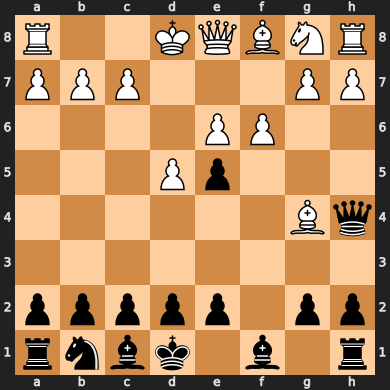

In [44]:
board = chess.Board(fens_flat[30])
board